Purpose of this notebook is to examine stop words and lemmatize cleaned csv.

In [1]:
# imports - basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# imports modeling
from sklearn.feature_extraction.text import CountVectorizer

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

In [2]:
# read in EDA cleaned file
df = pd.read_csv('../CommentFiles/Comments_EDA_lem.csv')

In [3]:
# convert subreddit into binary labels
df['subreddit'] = df['subreddit'].map({'sportsbook': 1, 'dfsports': 0})

In [4]:
# Instantiate CountVectorizer
cvec = CountVectorizer(stop_words='english')

In [5]:
# Fit and transform data sets
body_cvec = cvec.fit_transform(df['body'].astype(str))

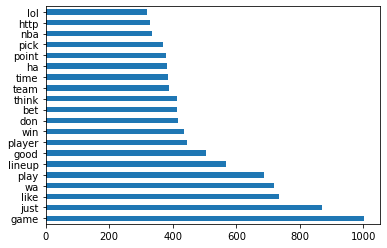

In [6]:
# check for top occuring words
# convert X_train to df
body_cvec_df = pd.DataFrame(body_cvec.todense(), columns=cvec.get_feature_names())
# plot top occuring words; top 20
body_cvec_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

## Annotation:
The graph above shows the top 20 words outside of the english stop words provided from sklearn.
This shows us some words that can be added. For example, http would be the beginning of a website link.  This is unnessary since the website name would provide more information.

In [7]:
# create custom stop words list to add custom words to from english stop words
custom_stop_words = []
for word in CountVectorizer(stop_words='english').get_stop_words():
    custom_stop_words.append(word)

In [8]:
# add https, com, lol, just, like to custom words list
new_words = ['https', 'com', 'lol', 'just', 'like', 'http', 'ha']
for word in new_words:
    custom_stop_words.append(word)

In [9]:
# Instantiate CountVectorizer
cvec = CountVectorizer(stop_words=custom_stop_words)

In [10]:
# Fit and transform data sets
body_cvec = cvec.fit_transform(df['body'].astype(str))

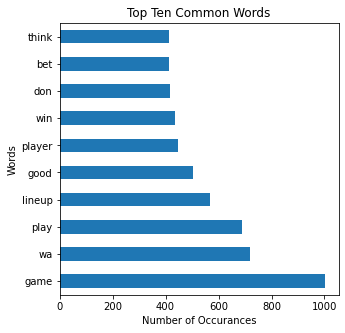

In [11]:
# check for top occuring words without stop words
body_cvec_df = pd.DataFrame(body_cvec.todense(), columns=cvec.get_feature_names())
# plot top occuring words; top 50
plt.figure(figsize=(5,5))
body_cvec_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top Ten Common Words')
plt.xlabel('Number of Occurances')
plt.ylabel('Words');

---

The next portion of the notebook creates a common list of words shared by both subreddits to be added to the stop words list.

In [12]:
# look at top words for each subreddit
sub_filter = df['subreddit'] == 1

In [13]:
# create sportsbook cvec 
sportsbook_cvec = cvec.fit_transform(df[sub_filter]['body'].astype(str))

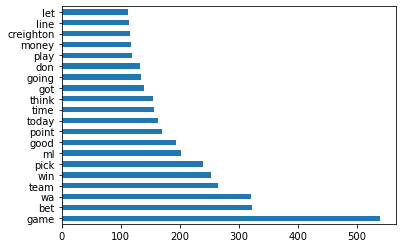

In [14]:
# create dataframe of cvec words
sportsbook_cvec_df = pd.DataFrame(sportsbook_cvec.todense(), columns=cvec.get_feature_names())
# plot common words
sportsbook_cvec_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

## Annotation:
The graph above shows the top 20 words outside of the english stop words provided from sklearn.
This shows us some words that can be added. For example, http would be the beginning of a website link.  This is unnessary since the website name would provide more information.

In [15]:
# look at top words for each subreddit
sub_filter1 = df['subreddit'] == 0

In [16]:
# create dfsports cvec 
dfs_cvec = cvec.fit_transform(df[sub_filter1]['body'].astype(str))

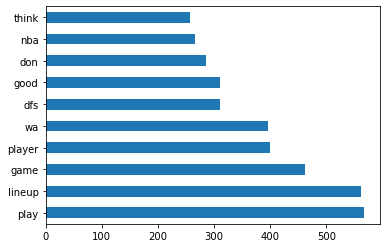

In [17]:
# create dataframe of cvec words
dfs_cvec_df = pd.DataFrame(dfs_cvec.todense(), columns=cvec.get_feature_names())
# plot common words
dfs_cvec_df.sum().sort_values(ascending=False).head(10).plot(kind='barh');

## Annotation:
The graph above shows the top 20 words outside of the english stop words provided from sklearn.
This shows us some words that can be added. For example, http would be the beginning of a website link.  This is unnessary since the website name would provide more information.

In [18]:
# create list of top 30 words for each subreddit then check for words in each
s = sportsbook_cvec_df.sum()
df1 = pd.DataFrame(zip(s,sportsbook_cvec_df.columns))

In [19]:
df1.sort_values(by=0, ascending=False, inplace=True)

In [20]:
df1[1].head(30).tolist()

['game',
 'bet',
 'wa',
 'team',
 'win',
 'pick',
 'ml',
 'good',
 'point',
 'today',
 'time',
 'think',
 'got',
 'going',
 'don',
 'play',
 'money',
 'creighton',
 'line',
 'let',
 '1h',
 'day',
 'hit',
 'really',
 'gonzaga',
 'parlay',
 'michigan',
 'record',
 've',
 'make']

In [21]:
# create function to look at top words in both subreddits
def create_list(df):
    # sum cvec
    s = df.sum()
    # zip sums and columns to dataframe
    df1 = pd.DataFrame(zip(s,df.columns))
    #sort new dataframe
    df1.sort_values(by=0, ascending=False, inplace=True)
    # return word column as list 
    return df1[1].head(50).tolist()

In [22]:
create_list(sportsbook_cvec_df)

['game',
 'bet',
 'wa',
 'team',
 'win',
 'pick',
 'ml',
 'good',
 'point',
 'today',
 'time',
 'think',
 'got',
 'going',
 'don',
 'play',
 'money',
 'creighton',
 'line',
 'let',
 '1h',
 'day',
 'hit',
 'really',
 'gonzaga',
 'parlay',
 'michigan',
 'record',
 've',
 'make',
 'look',
 'odds',
 'half',
 'way',
 'houston',
 'won',
 'stipe',
 'oregon',
 'unit',
 'live',
 'right',
 'fuck',
 'know',
 'betting',
 'better',
 'll',
 'ucla',
 'best',
 'ngannou',
 'alabama']

In [23]:
# create function to find commom words among top 50 words for each subreddit
def find_common_words(df1,df2):
    list1 = create_list(df1)
    list2 = create_list(df2)
    common_words_list = []
    for word in list1:
        if word in list2:
            common_words_list.append(word)
    return common_words_list

In [24]:
common_words_list = find_common_words(sportsbook_cvec_df, dfs_cvec_df)

In [25]:
common_words_list

['game',
 'wa',
 'team',
 'win',
 'pick',
 'good',
 'point',
 'time',
 'think',
 'got',
 'going',
 'don',
 'play',
 'money',
 'day',
 'really',
 've',
 'make',
 'look',
 'won',
 'right',
 'know',
 'll']

In [26]:
# add common lem words to custom stop words list
for word in common_words_list:
    custom_stop_words.append(word)

In [27]:
# check output 
custom_stop_words

['to',
 'seeming',
 'same',
 'move',
 'afterwards',
 'de',
 'however',
 'least',
 'thereby',
 'first',
 'whose',
 'cannot',
 'nothing',
 'over',
 'done',
 'an',
 'bottom',
 'two',
 'whereas',
 'interest',
 'another',
 'ever',
 'hasnt',
 'between',
 'always',
 're',
 'anyhow',
 'mostly',
 'against',
 'am',
 'had',
 'all',
 'system',
 'part',
 'of',
 'thence',
 'further',
 'may',
 'sometimes',
 'because',
 'and',
 'six',
 'our',
 'latterly',
 'towards',
 'while',
 'than',
 'never',
 'since',
 'rather',
 'the',
 'who',
 'where',
 'herself',
 'indeed',
 'namely',
 'onto',
 'into',
 'even',
 'them',
 'thus',
 'still',
 'whoever',
 'alone',
 'mine',
 'seems',
 'yourself',
 'then',
 'every',
 'only',
 'you',
 'seem',
 'via',
 'someone',
 'more',
 'themselves',
 'for',
 'herein',
 'ourselves',
 'wherever',
 'few',
 'thereafter',
 'whereby',
 'front',
 'anywhere',
 'perhaps',
 'thin',
 'his',
 'were',
 'other',
 'no',
 'until',
 'i',
 'if',
 'co',
 'show',
 'sixty',
 'become',
 'hereby',
 'alon

## Note:
By identifing common words list, I add these words to stop words list to try and improve model performance.  Will create custom word list .py file to easily import stop words list for future modeling. Repeating process for stem data.

---

Repeat the process for stemmed words.

In [28]:
# read in EDA cleaned file
df = pd.read_csv('../CommentFiles/Comments_EDA_stem.csv')

In [29]:
# convert subreddit into binary labels
df['subreddit'] = df['subreddit'].map({'sportsbook': 1, 'dfsports': 0})

In [30]:
# reinstaniate Countvectorizer for only english stop words
cvec = CountVectorizer(stop_words=custom_stop_words)

In [31]:
# look at top words for each subreddit
sub_filter = df['subreddit'] == 1

In [32]:
# create sportsbook cvec 
sportsbook_cvec = cvec.fit_transform(df[sub_filter]['body'].astype(str))

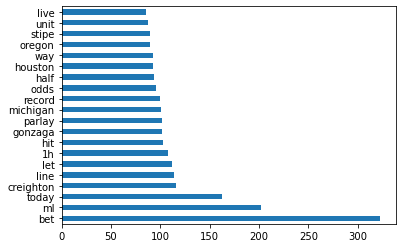

In [33]:
# create dataframe of cvec words
sportsbook_cvec_df = pd.DataFrame(sportsbook_cvec.todense(), columns=cvec.get_feature_names())
# plot common words
sportsbook_cvec_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

## Annotation:
The graph above shows the top 20 words outside of the english stop words provided from sklearn.
This shows us some words that can be added. For example, http would be the beginning of a website link.  This is unnessary since the website name would provide more information.

In [34]:
# look at top words for each subreddit
sub_filter1 = df['subreddit'] == 0

In [35]:
# create dfsports cvec 
dfs_cvec = cvec.fit_transform(df[sub_filter1]['body'].astype(str))

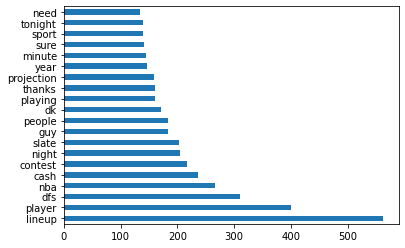

In [36]:
# create dataframe of cvec words
dfs_cvec_df = pd.DataFrame(dfs_cvec.todense(), columns=cvec.get_feature_names())
# plot common words
dfs_cvec_df.sum().sort_values(ascending=False).head(20).plot(kind='barh');

## Annotation:
The graph above shows the top 20 words outside of the english stop words provided from sklearn.
This shows us some words that can be added. For example, http would be the beginning of a website link.  This is unnessary since the website name would provide more information.

In [37]:
common_words_list = find_common_words(sportsbook_cvec_df, dfs_cvec_df)

In [38]:
# add common stem words to custom stop words list
for word in common_words_list:
    custom_stop_words.append(word)

In [39]:
# check output 
custom_stop_words

['to',
 'seeming',
 'same',
 'move',
 'afterwards',
 'de',
 'however',
 'least',
 'thereby',
 'first',
 'whose',
 'cannot',
 'nothing',
 'over',
 'done',
 'an',
 'bottom',
 'two',
 'whereas',
 'interest',
 'another',
 'ever',
 'hasnt',
 'between',
 'always',
 're',
 'anyhow',
 'mostly',
 'against',
 'am',
 'had',
 'all',
 'system',
 'part',
 'of',
 'thence',
 'further',
 'may',
 'sometimes',
 'because',
 'and',
 'six',
 'our',
 'latterly',
 'towards',
 'while',
 'than',
 'never',
 'since',
 'rather',
 'the',
 'who',
 'where',
 'herself',
 'indeed',
 'namely',
 'onto',
 'into',
 'even',
 'them',
 'thus',
 'still',
 'whoever',
 'alone',
 'mine',
 'seems',
 'yourself',
 'then',
 'every',
 'only',
 'you',
 'seem',
 'via',
 'someone',
 'more',
 'themselves',
 'for',
 'herein',
 'ourselves',
 'wherever',
 'few',
 'thereafter',
 'whereby',
 'front',
 'anywhere',
 'perhaps',
 'thin',
 'his',
 'were',
 'other',
 'no',
 'until',
 'i',
 'if',
 'co',
 'show',
 'sixty',
 'become',
 'hereby',
 'alon

In [40]:
# Instantiate CountVectorizer
cvec2 = CountVectorizer(stop_words=custom_stop_words)

In [41]:
# Fit and transform data sets
body_cvec2 = cvec2.fit_transform(df['body'].astype(str))

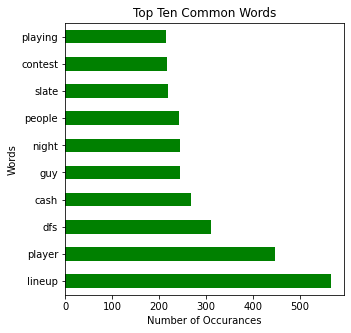

In [43]:
# check for top occuring words without stop words
body_cvec_df2 = pd.DataFrame(body_cvec2.todense(), columns=cvec2.get_feature_names())
# plot top occuring words; top 50
plt.figure(figsize=(5,5))
body_cvec_df2.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='green')
plt.title('Top Ten Common Words')
plt.xlabel('Number of Occurances')
plt.ylabel('Words');